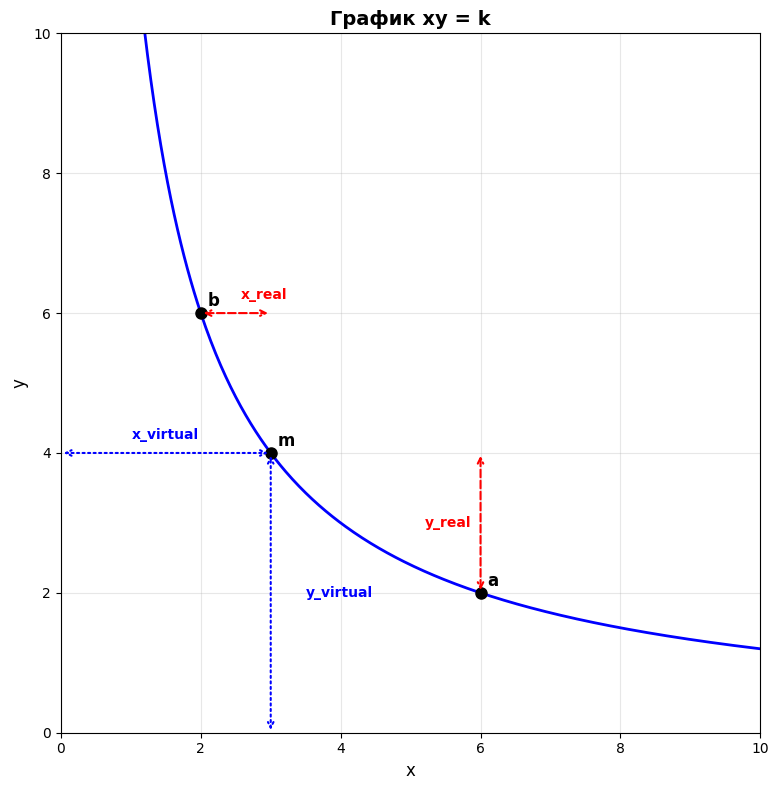

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Set the parameter k
k = 12

# Define the hyperbola function x*y = k => y = k/x
def hyperbola(x):
    return k / x

# Define the points
a = (k/2, 2)      # [k/2; 2]
b = (k/6, 6)      # [k/6; 6]
m = (k/4, 4)      # [k/4; 4]

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Generate x values for the hyperbola (avoid x=0)
x_hyperbola = np.linspace(0.5, 10, 400)
y_hyperbola = hyperbola(x_hyperbola)

# Plot the hyperbola
ax.plot(x_hyperbola, y_hyperbola, 'b-', linewidth=2, label='xy = k')

# Plot the lines with arrows
# 1. x_real - horizontal from [k/6; 6] to [k/4; 6] - RED
x_real_x = [b[0], m[0]]
x_real_y = [6, 6]
ax.annotate('', xy=(m[0], 6), xytext=(b[0], 6),
            arrowprops=dict(arrowstyle='<->', color='red', linestyle='--', linewidth=1.5))
# Label for x_real
x_real_mid_x = (b[0] + m[0]) / 2
ax.text(x_real_mid_x + 0.4, 6.2, 'x_real', color='red', fontsize=10, 
        fontweight='bold', ha='center')

# 2. y_real - vertical from [k/2; 2] to [k/2; 4] - RED
y_real_x = [a[0], a[0]]
y_real_y = [2, 4]
ax.annotate('', xy=(a[0], 4), xytext=(a[0], 2),
            arrowprops=dict(arrowstyle='<->', color='red', linestyle='--', linewidth=1.5))
# Label for y_real
ax.text(a[0] - 0.8, 3, 'y_real', color='red', fontsize=10, 
        fontweight='bold', va='center')

# 3. x_virtual - horizontal from [0; 4] to [k/4; 4] - BLUE
x_virtual_x = [0, m[0]]
x_virtual_y = [4, 4]
ax.annotate('', xy=(m[0], 4), xytext=(0, 4),
            arrowprops=dict(arrowstyle='<->', color='blue', linestyle=':', linewidth=1.5))
# Label for x_virtual
x_virtual_mid_x = m[0] / 2
ax.text(x_virtual_mid_x, 4.2, 'x_virtual', color='blue', fontsize=10, 
        fontweight='bold', ha='center')

# 4. y_virtual - vertical from [k/4; 0] to [k/4; 4] - BLUE
y_virtual_x = [m[0], m[0]]
y_virtual_y = [0, 4]
ax.annotate('', xy=(m[0], 4), xytext=(m[0], 0),
            arrowprops=dict(arrowstyle='<->', color='blue', linestyle=':', linewidth=1.5))
# Label for y_virtual
ax.text(m[0] + 0.5, 2, 'y_virtual', color='blue', fontsize=10, 
        fontweight='bold', va='center')

# Plot the points with labels (all in black)
points = {'a': a, 'b': b, 'm': m}

for label, point in points.items():
    ax.plot(point[0], point[1], 'o', color='black', markersize=8)
    ax.text(point[0] + 0.1, point[1] + 0.1, label, fontsize=12, 
            fontweight='bold', color='black')
    
# Set plot limits and labels
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.set_title('График xy = k', fontsize=14, fontweight='bold')

# Add grid
ax.grid(True, alpha=0.3)

# Set equal aspect ratio
ax.set_aspect('equal', adjustable='box')

# Show the plot
plt.tight_layout()
plt.show()